In [80]:

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from datetime import datetime

In [82]:
filename = "/content/gdrive/MyDrive/ai_for_hearts/USAforUNHCR_LeadGen_Emails.csv" #do we also combine this df?
df = pd.read_csv(filename)

filename2 = "/content/gdrive/MyDrive/ai_for_hearts/updated_lgadv_contacts.csv"
df2 = pd.read_csv(filename2)

filename3 = "/content/gdrive/MyDrive/ai_for_hearts/clicks (1).csv"
df_click = pd.read_csv(filename3)

filename4 = "/content/gdrive/MyDrive/ai_for_hearts/opens (1).csv"
df_open = pd.read_csv(filename4)

filename5 = "/content/gdrive/MyDrive/ai_for_hearts/sent (1).csv"
df_sent = pd.read_csv(filename5)


## DATA UNDERSTADING

In [83]:
df.head()

,contactid,emailid,emailname,senddate,opendate,clickdate
0,0031K0000385TbjQAE,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
1,0031K0000385TiGQAU,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
2,0031K0000385TP9QAM,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
3,0031K0000385TQbQAM,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
4,0031K0000385TqzQAE,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN


In [84]:
df2.head()

,contactid,campaignid,name,leadgen,advocacy,accountid,createddate,membership_type__c,first_gift_date__c,first_gift_amount__c,mrc_date__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
0,0031K0000385TNIQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THMvxQAH,2022-01-01 00:08:27+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,0031K0000385TZJQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN83QAH,2022-01-01 02:33:16+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0031K0000385TavQAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN9aQAH,2022-01-01 02:55:58+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0031K0000385Tc8QAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNAsQAP,2022-01-01 03:11:39+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,0031K0000385TdQQAU,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNCFQA5,2022-01-01 03:27:19+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [85]:
df.shape

(398061, 6)

In [86]:
df2.shape

(24713, 20)

In [87]:
df.shape[0]

398061

dropping null values for datasets

In [88]:
#null value count for dataset 1
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

contactid         0
emailid           0
emailname         0
senddate          0
opendate     308887
clickdate    392130
dtype: int64

In [89]:
#null value count for dataset 2
nan_count2 = np.sum(df2.isnull(), axis = 0)
nan_count2

# observation: looks like 200 people donated from shape and the number of null values

contactid                                          0
campaignid                                         0
name                                               0
leadgen                                            0
advocacy                                           0
accountid                                          0
createddate                                        0
membership_type__c                                 0
first_gift_date__c                             24511
first_gift_amount__c                           24511
mrc_date__c                                    24511
mrc_amount__c                                  24511
current_calendar_year_total_amount__c          24511
current_calendar_year_total_transactions__c    24511
previous_calendar_year_total_amount__c         24511
previous_calendar_year_total_transaction__c    24511
total_amount__c                                24506
total_transactions__c                          24506
email                                         

In [90]:
col_types1 = df.dtypes
col_types1
# all features are objects besides emailid which is an int type

contactid    object
emailid       int64
emailname    object
senddate     object
opendate     object
clickdate    object
dtype: object

In [91]:
col_types2 = df2.dtypes
col_types2
# donation amounts are floats

contactid                                       object
campaignid                                      object
name                                            object
leadgen                                          int64
advocacy                                         int64
accountid                                       object
createddate                                     object
membership_type__c                              object
first_gift_date__c                              object
first_gift_amount__c                           float64
mrc_date__c                                     object
mrc_amount__c                                  float64
current_calendar_year_total_amount__c          float64
current_calendar_year_total_transactions__c    float64
previous_calendar_year_total_amount__c         float64
previous_calendar_year_total_transaction__c    float64
total_amount__c                                float64
total_transactions__c                          float64
email     

In [92]:
df1_no_na = df[df['opendate'].notna()]
df1_no_na.head()

,contactid,emailid,emailname,senddate,opendate,clickdate
9,0031K0000385aRTQAY,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-04 09:07:44.720000000,2022-01-04 10:27:52,NaN
21,0031K0000385W1PQAU,89462,20220105 - EOY Thank You Engagement - full fil...,2022-01-05 11:02:52.350000000,2022-01-05 11:09:14,NaN
67,0031K0000385eVBQAY,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-01-11 09:07:44.643000000,2022-01-11 09:29:24,NaN
72,0031K0000385WEtQAM,37930,201906 - Lead Gen Welcome - Email 4 - DM - sta...,2022-01-12 09:06:13.660000000,2022-01-12 16:09:58,NaN
78,0031K0000385WFSQA2,39536,201906 - Lead Gen Welcome - Email 4 - DM - donor,2022-01-12 09:06:43.100000000,2022-01-12 13:33:35,NaN


In [93]:
df1_no_na.fillna(0)

,contactid,emailid,emailname,senddate,opendate,clickdate
9,0031K0000385aRTQAY,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-04 09:07:44.720000000,2022-01-04 10:27:52,0
21,0031K0000385W1PQAU,89462,20220105 - EOY Thank You Engagement - full fil...,2022-01-05 11:02:52.350000000,2022-01-05 11:09:14,0
67,0031K0000385eVBQAY,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-01-11 09:07:44.643000000,2022-01-11 09:29:24,0
72,0031K0000385WEtQAM,37930,201906 - Lead Gen Welcome - Email 4 - DM - sta...,2022-01-12 09:06:13.660000000,2022-01-12 16:09:58,0
78,0031K0000385WFSQA2,39536,201906 - Lead Gen Welcome - Email 4 - DM - donor,2022-01-12 09:06:43.100000000,2022-01-12 13:33:35,0
...,...,...,...,...,...,...
398037,0031K00003Clo2VQAR,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 09:54:02,0
398040,0031K00003Clo3aQAB,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 14:43:38,0
398046,0031K00003Clo49QAB,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 19:04:50,0
398051,0031K00003Clo6HQAR,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 08:28:13,0


In [94]:
nan_count = np.sum(df1_no_na.isnull(), axis = 0)
nan_count

contactid        0
emailid          0
emailname        0
senddate         0
opendate         0
clickdate    84072
dtype: int64

In [95]:
# df2_no_na = df2[df2['first_gift_date__c'].notna()]
df2_no_na = df2
df2_no_na.head()

,contactid,campaignid,name,leadgen,advocacy,accountid,createddate,membership_type__c,first_gift_date__c,first_gift_amount__c,mrc_date__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
0,0031K0000385TNIQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THMvxQAH,2022-01-01 00:08:27+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,0031K0000385TZJQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN83QAH,2022-01-01 02:33:16+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0031K0000385TavQAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN9aQAH,2022-01-01 02:55:58+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0031K0000385Tc8QAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNAsQAP,2022-01-01 03:11:39+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,0031K0000385TdQQAU,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNCFQA5,2022-01-01 03:27:19+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [96]:
nan_count = np.sum(df2_no_na.isnull(), axis = 0)
nan_count

contactid                                          0
campaignid                                         0
name                                               0
leadgen                                            0
advocacy                                           0
accountid                                          0
createddate                                        0
membership_type__c                                 0
first_gift_date__c                             24511
first_gift_amount__c                           24511
mrc_date__c                                    24511
mrc_amount__c                                  24511
current_calendar_year_total_amount__c          24511
current_calendar_year_total_transactions__c    24511
previous_calendar_year_total_amount__c         24511
previous_calendar_year_total_transaction__c    24511
total_amount__c                                24506
total_transactions__c                          24506
email                                         

In [97]:
df.shape

(398061, 6)

In [98]:
df1_no_na.shape

(89174, 6)

In [99]:
df2.shape

(24713, 20)

In [100]:
df2_no_na.shape

(24713, 20)

In [101]:
#df1_no_na['time_diff'] = df1_no_na['senddate'] - df1_no_na['opendate']

In [102]:
#%matplotlib inline
#x= df1_no_na['senddate']
#y= df1_no_na['opendate']
#plt.plot(x,y)

DateTime

In [103]:
df1_no_na['senddate'] = pd.to_datetime(df1_no_na['senddate'], format='%Y-%m-%d %H:%M:%S')
df1_no_na['senddate']

<ipython-input-103-a10c25f042f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_na['senddate'] = pd.to_datetime(df1_no_na['senddate'], format='%Y-%m-%d %H:%M:%S')


9        2022-01-04 09:07:44.720
21       2022-01-05 11:02:52.350
67       2022-01-11 09:07:44.643
72       2022-01-12 09:06:13.660
78       2022-01-12 09:06:43.100
                   ...          
398037   2022-07-26 08:10:09.780
398040   2022-07-26 08:10:09.780
398046   2022-07-26 08:10:09.780
398051   2022-07-26 08:10:09.780
398056   2022-07-26 08:10:09.780
Name: senddate, Length: 89174, dtype: datetime64[ns]

In [104]:
df1_no_na['opendate'] = pd.to_datetime(df1_no_na['opendate'], format='%Y-%m-%d %H:%M:%S')
df1_no_na['opendate']

<ipython-input-104-60d40e5f072d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_na['opendate'] = pd.to_datetime(df1_no_na['opendate'], format='%Y-%m-%d %H:%M:%S')


9        2022-01-04 10:27:52
21       2022-01-05 11:09:14
67       2022-01-11 09:29:24
72       2022-01-12 16:09:58
78       2022-01-12 13:33:35
                 ...        
398037   2022-07-26 09:54:02
398040   2022-07-26 14:43:38
398046   2022-07-26 19:04:50
398051   2022-07-26 08:28:13
398056   2022-07-26 09:38:23
Name: opendate, Length: 89174, dtype: datetime64[ns]

In [105]:
df1_no_na['clickdate'] = pd.to_datetime(df1_no_na['clickdate'], format='%Y-%m-%d %H:%M:%S')
df1_no_na['clickdate']

<ipython-input-105-fcee48413568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_na['clickdate'] = pd.to_datetime(df1_no_na['clickdate'], format='%Y-%m-%d %H:%M:%S')


9        NaT
21       NaT
67       NaT
72       NaT
78       NaT
          ..
398037   NaT
398040   NaT
398046   NaT
398051   NaT
398056   NaT
Name: clickdate, Length: 89174, dtype: datetime64[ns]

In [106]:
df2_no_na['createddate'] = pd.to_datetime(df2_no_na['createddate'], format='%Y-%m-%d %H:%M:%S')
df2_no_na['createddate']

0       2022-01-01 00:08:27+00:00
1       2022-01-01 02:33:16+00:00
2       2022-01-01 02:55:58+00:00
3       2022-01-01 03:11:39+00:00
4       2022-01-01 03:27:19+00:00
                   ...           
24708   2022-06-14 14:44:49+00:00
24709   2022-06-14 14:44:49+00:00
24710   2022-06-14 14:44:49+00:00
24711   2022-06-14 14:44:49+00:00
24712   2022-06-14 14:44:49+00:00
Name: createddate, Length: 24713, dtype: datetime64[ns, UTC]

In [107]:
df2_no_na['first_gift_date__c'] = pd.to_datetime(df2_no_na['first_gift_date__c'], format='%Y-%m-%d %H:%M:%S')
df2_no_na['first_gift_date__c']

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
24708   NaT
24709   NaT
24710   NaT
24711   NaT
24712   NaT
Name: first_gift_date__c, Length: 24713, dtype: datetime64[ns]

In [108]:
# df2_no_na['days_till_first'] = (df2_no_na['first_gift_date__c'] - df2_no_na['createddate']).dt.days

Additional Datasets

In [109]:
df_click = df_click.rename({'eventdate': 'eventdate_click', 'eventtype':'eventtype_click'}, axis=1)

In [110]:
df_click.shape

(6939, 6)

In [111]:
df_click.head()

,contactid,eventdate_click,eventtype_click,sendid,urlid,url
0,0031K00003B2PQmQAN,4/21/2022 12:08:19 AM,Click,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
1,0031K00003B2PQmQAN,4/21/2022 12:10:08 AM,Click,765495,337899,https://www.unrefugees.org/news/not-even-monso...
2,0031K00003AQPzjQAH,4/20/2022 10:41:07 AM,Click,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
3,0031K00003BNevBQAT,4/21/2022 11:46:52 AM,Click,890270,1094332,https://www.unrefugees.org/news/learn-how-you-...
4,0031K00003BOdezQAD,4/21/2022 11:26:15 AM,Click,890270,158534,http://www.facebook.com/UNREFUGEES?utm_medium=...


In [112]:
nan_count3 = np.sum(df_click.isnull(), axis = 0)
print(nan_count3)

contactid          0
eventdate_click    0
eventtype_click    0
sendid             0
urlid              0
url                0
dtype: int64


In [113]:
print(df_click['eventtype_click'].unique())

['Click']


In [114]:
df_click['eventtype_click'] = df_click['eventtype_click'].map({'Click' : 1, '' : 0})

In [115]:
df_click.head()

,contactid,eventdate_click,eventtype_click,sendid,urlid,url
0,0031K00003B2PQmQAN,4/21/2022 12:08:19 AM,1,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
1,0031K00003B2PQmQAN,4/21/2022 12:10:08 AM,1,765495,337899,https://www.unrefugees.org/news/not-even-monso...
2,0031K00003AQPzjQAH,4/20/2022 10:41:07 AM,1,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
3,0031K00003BNevBQAT,4/21/2022 11:46:52 AM,1,890270,1094332,https://www.unrefugees.org/news/learn-how-you-...
4,0031K00003BOdezQAD,4/21/2022 11:26:15 AM,1,890270,158534,http://www.facebook.com/UNREFUGEES?utm_medium=...


In [116]:
df_click['eventtype_click'].dtype # check column only has integers

dtype('int64')

In [117]:
df_open = df_open.rename({'eventdate': 'eventdate_open', 'eventtype':'eventtype_open'}, axis=1)

In [118]:
df_open.head()

,contactid,eventdate_open,eventtype_open,sendid
0,0031K0000386BslQAE,4/19/22 7:37,Open,883709
1,0031K0000386BslQAE,4/19/22 7:37,Open,877618
2,0031K00003AMz7nQAD,4/19/22 7:41,Open,886508
3,0031K00003AO0VcQAL,4/19/22 8:04,Open,889440
4,0031K00003877mQQAQ,4/19/22 8:05,Open,889440


In [119]:
df_open.shape

(137870, 4)

In [120]:
nan_count4 = np.sum(df_open.isnull(), axis = 0)
print(nan_count4)

contactid         0
eventdate_open    0
eventtype_open    0
sendid            0
dtype: int64


In [121]:
print(df_open['eventtype_open'].unique())

['Open']


In [122]:
df_open['eventtype_open'] = df_open['eventtype_open'].map({'Open' : 1, '' : 0})

In [123]:
df_open.head()

,contactid,eventdate_open,eventtype_open,sendid
0,0031K0000386BslQAE,4/19/22 7:37,1,883709
1,0031K0000386BslQAE,4/19/22 7:37,1,877618
2,0031K00003AMz7nQAD,4/19/22 7:41,1,886508
3,0031K00003AO0VcQAL,4/19/22 8:04,1,889440
4,0031K00003877mQQAQ,4/19/22 8:05,1,889440


In [124]:
df_open['eventtype_open'].dtype # check column only has integers

dtype('int64')

In [125]:
df_sent = df_sent.rename({'eventdate': 'eventdate_sent', 'eventtype': 'eventtype_sent'}, axis=1)

In [126]:
df_sent.head()

,contactid,eventdate_sent,eventtype_sent,sendid
0,0031K00003B42UhQAJ,4/28/22 8:02,Sent,891711
1,0031K00003B42UhQAJ,4/19/22 8:04,Sent,889440
2,0031K00003B42fvQAB,4/28/22 8:02,Sent,891711
3,0031K00003B438DQAR,5/17/22 15:01,Sent,906349
4,0031K00003B44irQAB,5/8/22 16:01,Sent,902017


In [127]:
print(df_sent['eventtype_sent'].unique())

['Sent']


In [128]:
df_sent['eventtype_sent'] = df_sent['eventtype_sent'].map({'Sent' : 1, '' : 0})

In [129]:
df_open['eventtype_open'].dtype # check column only has integers

dtype('int64')

In [130]:
df_sent.head()

,contactid,eventdate_sent,eventtype_sent,sendid
0,0031K00003B42UhQAJ,4/28/22 8:02,1,891711
1,0031K00003B42UhQAJ,4/19/22 8:04,1,889440
2,0031K00003B42fvQAB,4/28/22 8:02,1,891711
3,0031K00003B438DQAR,5/17/22 15:01,1,906349
4,0031K00003B44irQAB,5/8/22 16:01,1,902017


In [131]:
nan_count5 = np.sum(df_sent.isnull(), axis = 0)
print(nan_count5)

contactid         0
eventdate_sent    0
eventtype_sent    0
sendid            0
dtype: int64


In [132]:
nan_count5.mean()

0.0

Groupby for each dataframe (aggregation through contact ids)

In [133]:
df_click_groupbys = df_click.groupby(['contactid']).sum()

<ipython-input-133-7f2041fc7ec8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_click_groupbys = df_click.groupby(['contactid']).sum()


In [134]:
df_sent_groupbys = df_sent.groupby(['contactid']).sum()

<ipython-input-134-2c453395fbe2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sent_groupbys = df_sent.groupby(['contactid']).sum()


In [135]:
df_open_groupbys = df_open.groupby(['contactid']).sum()

<ipython-input-135-0266b7233fa7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_open_groupbys = df_open.groupby(['contactid']).sum()


Merging of Main DataFrames with Left Joins

In [136]:
print(df_click.columns)

Index(['contactid', 'eventdate_click', 'eventtype_click', 'sendid', 'urlid',
       'url'],
      dtype='object')


In [137]:
print(df_open.columns)

Index(['contactid', 'eventdate_open', 'eventtype_open', 'sendid'], dtype='object')


In [138]:
s1 = df_click_groupbys.merge( df_open_groupbys, how='inner', on=['contactid'])

In [139]:
s1

,eventtype_click,sendid_x,urlid,eventtype_open,sendid_y
contactid,,,,,
0031K0000385TiGQAU,1,865923,1517543,33,29231621
0031K0000385TrdQAE,1,860781,1511197,8,6468129
0031K0000385USpQAM,1,765498,158533,4,3438870
0031K0000385UeVQAU,1,765498,290643,8,6368546
0031K0000385UkxQAE,1,937762,1300915,2,1793333
...,...,...,...,...,...
0031K00003Ck2xbQAB,1,937758,1652199,20,18380241
0031K00003Ck44JQAR,1,937758,158538,1,937758
0031K00003Ck5qTQAR,3,2296494,871926,16,13904304


In [140]:
s1['eventtype_open'].mean()

19.26674689129563

In [141]:
s1.shape

(2493, 5)

In [142]:
s2 = s1.merge(df_sent_groupbys, how = 'inner', on = 'contactid')

In [143]:
s2

,eventtype_click,sendid_x,urlid,eventtype_open,sendid_y,eventtype_sent,sendid
contactid,,,,,,,
0031K0000385TiGQAU,1,865923,1517543,33,29231621,56,49535533
0031K0000385TrdQAE,1,860781,1511197,8,6468129,15,12301169
0031K0000385USpQAM,1,765498,158533,4,3438870,56,49535674
0031K0000385UeVQAU,1,765498,290643,8,6368546,56,49535687
0031K0000385UkxQAE,1,937762,1300915,2,1793333,56,49535706
...,...,...,...,...,...,...,...
0031K00003Ck2xbQAB,1,937758,1652199,20,18380241,16,14381483
0031K00003Ck44JQAR,1,937758,158538,1,937758,16,14381503
0031K00003Ck5qTQAR,3,2296494,871926,16,13904304,16,14381482


In [144]:
s2_final = s2.drop(['sendid_x', 'urlid', 'sendid_y', 'sendid'], axis=1)

In [145]:
s2_final.shape

(2493, 3)

In [146]:
s2_final.head()

,eventtype_click,eventtype_open,eventtype_sent
contactid,,,
0031K0000385TiGQAU,1,33,56
0031K0000385TrdQAE,1,8,15
0031K0000385USpQAM,1,4,56
0031K0000385UeVQAU,1,8,56
0031K0000385UkxQAE,1,2,56


In [147]:
s4 = s2_final.merge(df1_no_na, how = 'left', on = 'contactid')
s4

,contactid,eventtype_click,eventtype_open,eventtype_sent,emailid,emailname,senddate,opendate,clickdate
0,0031K0000385TiGQAU,1,33,56,90387.0,20220119 - Afghanistan Conversion Nazia Appeal...,2022-01-19 12:01:42.913,2022-01-20 08:17:28,NaT
1,0031K0000385TiGQAU,1,33,56,90504.0,20220125 - Afghanistan Conversion Fauzia Appea...,2022-01-25 09:03:00.333,2022-01-25 13:14:35,NaT
2,0031K0000385TiGQAU,1,33,56,92518.0,20220224 - Ukraine Emergency Appeal - full fil...,2022-02-24 11:31:27.120,2022-02-24 14:44:46,NaT
3,0031K0000385TiGQAU,1,33,56,92921.0,20220308 - IWD Ukraine Engagement - new or eng...,2022-03-08 08:01:52.137,2022-03-08 10:32:45,2022-03-08 10:32:06
4,0031K0000385TiGQAU,1,33,56,94183.0,20220324 - Ukraine 1 Month Engagement - full f...,2022-03-24 09:31:42.717,2022-03-25 20:15:40,NaT
...,...,...,...,...,...,...,...,...,...
16632,0031K00003Ck44JQAR,1,1,16,NaN,NaN,NaT,NaT,NaT
16633,0031K00003Ck5qTQAR,3,16,16,NaN,NaN,NaT,NaT,NaT
16634,0031K00003Ck5xZQAR,1,1,15,NaN,NaN,NaT,NaT,NaT
16635,0031K00003Ck6GTQAZ,1,5,13,37925.0,201906 - Lead Gen Welcome - Email 1 - DM,2022-06-30 08:05:54.607,2022-06-30 12:23:00,NaT


In [148]:
s4_final = df2_no_na.merge(s4, how = 'left', on = 'contactid')
s4_final

,contactid,campaignid,name,leadgen,advocacy,accountid,createddate,membership_type__c,first_gift_date__c,first_gift_amount__c,...,email,phone,eventtype_click,eventtype_open,eventtype_sent,emailid,emailname,senddate,opendate,clickdate
0,0031K0000385TNIQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THMvxQAH,2022-01-01 00:08:27+00:00,Donor Prospect,NaT,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
1,0031K0000385TZJQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN83QAH,2022-01-01 02:33:16+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
2,0031K0000385TavQAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN9aQAH,2022-01-01 02:55:58+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
3,0031K0000385Tc8QAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNAsQAP,2022-01-01 03:11:39+00:00,Donor Prospect,NaT,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
4,0031K0000385TdQQAU,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNCFQA5,2022-01-01 03:27:19+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38852,0031K00003C2IN8QAN,7011K00000231T9QAI,2022_RefugeesEverywhere_Adv_DailyKos,0,1,0011K00002Ww8r0QAB,2022-06-14 14:44:49+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
38853,0031K00003C2INGQA3,7011K00000231T9QAI,2022_RefugeesEverywhere_Adv_DailyKos,0,1,0011K00002Ww8r8QAB,2022-06-14 14:44:49+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
38854,0031K00003C2INHQA3,7011K00000231T9QAI,2022_RefugeesEverywhere_Adv_DailyKos,0,1,0011K00002Ww8r9QAB,2022-06-14 14:44:49+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT
38855,0031K00003C2INIQA3,7011K00000231T9QAI,2022_RefugeesEverywhere_Adv_DailyKos,0,1,0011K00002Ww8rAQAR,2022-06-14 14:44:49+00:00,Donor Prospect,NaT,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


DateTime

In [149]:
s4_final['createddate'] = s4_final['createddate'].dt.tz_localize(None)

In [150]:
s4_final.dtypes

contactid                                              object
campaignid                                             object
name                                                   object
leadgen                                                 int64
advocacy                                                int64
accountid                                              object
createddate                                    datetime64[ns]
membership_type__c                                     object
first_gift_date__c                             datetime64[ns]
first_gift_amount__c                                  float64
mrc_date__c                                            object
mrc_amount__c                                         float64
current_calendar_year_total_amount__c                 float64
current_calendar_year_total_transactions__c           float64
previous_calendar_year_total_amount__c                float64
previous_calendar_year_total_transaction__c           float64
total_am

In [151]:
#takes s4 dataframe and fills null values with zero as to note remove entire rows in order to not lose data. The resulting dataframe with filled values is named s4_final
# s4_final = s4_final.fillna("0000-00-00 00:00:00.000")
s4_final.shape

(38857, 28)

In [152]:
s4_final.dtypes


contactid                                              object
campaignid                                             object
name                                                   object
leadgen                                                 int64
advocacy                                                int64
accountid                                              object
createddate                                    datetime64[ns]
membership_type__c                                     object
first_gift_date__c                             datetime64[ns]
first_gift_amount__c                                  float64
mrc_date__c                                            object
mrc_amount__c                                         float64
current_calendar_year_total_amount__c                 float64
current_calendar_year_total_transactions__c           float64
previous_calendar_year_total_amount__c                float64
previous_calendar_year_total_transaction__c           float64
total_am

In [153]:
s4_final['send_open_hrs'] = (s4_final['opendate'] - s4_final['senddate']).dt.seconds // 3600
s4_final['send_open_hrs']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
38852   NaN
38853   NaN
38854   NaN
38855   NaN
38856   NaN
Name: send_open_hrs, Length: 38857, dtype: float64

In [154]:
s4_final['send_click_hrs'] = (s4_final['clickdate'] - s4_final['senddate']).dt.seconds // 3600

s4_final['send_click_hrs']
s4_final['send_click_hrs'] = s4_final['send_click_hrs'].notna()

In [155]:
s4_final['send_click_hrs'].mean()

0.055434027330982835

In [156]:
s4_final['create_donate_days'] = (s4_final['first_gift_date__c'] - s4_final['createddate']).dt.days
s4_final['create_donate_days']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
38852   NaN
38853   NaN
38854   NaN
38855   NaN
38856   NaN
Name: create_donate_days, Length: 38857, dtype: float64

In [157]:
s4_final['create_donate_days'].mean()

32.6710182767624

In [158]:
# drop datetime columns after found time diffs
s4_final = s4_final.select_dtypes(exclude=['object', 'datetime64[ns]'])
s4_final

,leadgen,advocacy,first_gift_amount__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone,eventtype_click,eventtype_open,eventtype_sent,emailid,send_open_hrs,send_click_hrs,create_donate_days
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,False,NaN
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,False,NaN
4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38852,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
38853,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
38854,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN
38855,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,False,NaN


In [159]:
s4_final.dtypes

leadgen                                          int64
advocacy                                         int64
first_gift_amount__c                           float64
mrc_amount__c                                  float64
current_calendar_year_total_amount__c          float64
current_calendar_year_total_transactions__c    float64
previous_calendar_year_total_amount__c         float64
previous_calendar_year_total_transaction__c    float64
total_amount__c                                float64
total_transactions__c                          float64
email                                            int64
phone                                            int64
eventtype_click                                float64
eventtype_open                                 float64
eventtype_sent                                 float64
emailid                                        float64
send_open_hrs                                  float64
send_click_hrs                                    bool
create_don

Binary Donated Column

In [160]:
s4_final['donated'] = np.where(s4_final['first_gift_amount__c'] > 0, True, False)

In [161]:
s4_final['donated']

0        False
1        False
2        False
3        False
4        False
         ...  
38852    False
38853    False
38854    False
38855    False
38856    False
Name: donated, Length: 38857, dtype: bool

In [162]:
s4_final['donated'].value_counts()

False    38091
True       766
Name: donated, dtype: int64

In [163]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                            0
advocacy                                           0
first_gift_amount__c                           38091
mrc_amount__c                                  38091
current_calendar_year_total_amount__c          38091
current_calendar_year_total_transactions__c    38091
previous_calendar_year_total_amount__c         38091
previous_calendar_year_total_transaction__c    38091
total_amount__c                                38083
total_transactions__c                          38083
email                                              0
phone                                              0
eventtype_click                                22220
eventtype_open                                 22220
eventtype_sent                                 22220
emailid                                        22486
send_open_hrs                                  22486
send_click_hrs                                     0
create_donate_days                            

In [164]:
s4_final['eventtype_click'].value_counts()

1.0      8447
2.0      3799
3.0      2025
4.0      1103
5.0       473
6.0       237
7.0       113
8.0       111
13.0       55
15.0       48
10.0       45
368.0      26
14.0       24
16.0       24
9.0        19
11.0       17
24.0       16
17.0       12
147.0      10
212.0       8
83.0        7
12.0        5
49.0        3
25.0        3
18.0        1
40.0        1
242.0       1
120.0       1
305.0       1
19.0        1
138.0       1
Name: eventtype_click, dtype: int64

In [165]:
s4_final = s4_final[s4_final['eventtype_click'].notna()]

In [166]:
s4_final = s4_final[s4_final['eventtype_open'].notna()]

In [167]:
s4_final = s4_final[s4_final['eventtype_sent'].notna()]

In [168]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                            0
advocacy                                           0
first_gift_amount__c                           16002
mrc_amount__c                                  16002
current_calendar_year_total_amount__c          16002
current_calendar_year_total_transactions__c    16002
previous_calendar_year_total_amount__c         16002
previous_calendar_year_total_transaction__c    16002
total_amount__c                                15998
total_transactions__c                          15998
email                                              0
phone                                              0
eventtype_click                                    0
eventtype_open                                     0
eventtype_sent                                     0
emailid                                          266
send_open_hrs                                    266
send_click_hrs                                     0
create_donate_days                            

In [169]:
s4_final = s4_final[s4_final['send_open_hrs'].notna()]

In [170]:
s4_final = s4_final[s4_final['send_click_hrs'].notna()]

In [171]:
s4_final = s4_final.drop('emailid', axis=1)

In [172]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                            0
advocacy                                           0
first_gift_amount__c                           15738
mrc_amount__c                                  15738
current_calendar_year_total_amount__c          15738
current_calendar_year_total_transactions__c    15738
previous_calendar_year_total_amount__c         15738
previous_calendar_year_total_transaction__c    15738
total_amount__c                                15734
total_transactions__c                          15734
email                                              0
phone                                              0
eventtype_click                                    0
eventtype_open                                     0
eventtype_sent                                     0
send_open_hrs                                      0
send_click_hrs                                     0
create_donate_days                             15738
donated                                       

In [173]:
s4_final = s4_final.drop('create_donate_days', axis=1)
s4_final = s4_final.drop('email', axis=1)
s4_final = s4_final.drop('phone', axis=1)

In [174]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                            0
advocacy                                           0
first_gift_amount__c                           15738
mrc_amount__c                                  15738
current_calendar_year_total_amount__c          15738
current_calendar_year_total_transactions__c    15738
previous_calendar_year_total_amount__c         15738
previous_calendar_year_total_transaction__c    15738
total_amount__c                                15734
total_transactions__c                          15734
eventtype_click                                    0
eventtype_open                                     0
eventtype_sent                                     0
send_open_hrs                                      0
send_click_hrs                                     0
donated                                            0
dtype: int64

In [175]:
s4_final['first_gift_amount__c'].value_counts()

120.00    117
20.00      61
50.00      58
60.00      58
10.00      58
25.00      49
30.00      38
75.00      32
150.00     23
500.00     22
20.60      20
25.75      16
100.00     11
10.30      10
400.00     10
240.00      9
15.00       9
40.00       8
5.00        6
15.45       5
5.15        4
10.55       4
30.90       3
35.00       2
Name: first_gift_amount__c, dtype: int64

In [176]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                            0
advocacy                                           0
first_gift_amount__c                           15738
mrc_amount__c                                  15738
current_calendar_year_total_amount__c          15738
current_calendar_year_total_transactions__c    15738
previous_calendar_year_total_amount__c         15738
previous_calendar_year_total_transaction__c    15738
total_amount__c                                15734
total_transactions__c                          15734
eventtype_click                                    0
eventtype_open                                     0
eventtype_sent                                     0
send_open_hrs                                      0
send_click_hrs                                     0
donated                                            0
dtype: int64

In [177]:
fga_mean =s4_final['first_gift_amount__c'].mean()
s4_final['first_gift_amount__c'].fillna(value=fga_mean, inplace=True)

In [178]:
mrc_mean =s4_final['mrc_amount__c'].mean()
s4_final['mrc_amount__c'].fillna(value=mrc_mean, inplace=True)

In [179]:
c_mean =s4_final['current_calendar_year_total_amount__c'].mean()
s4_final['current_calendar_year_total_amount__c'].fillna(value=c_mean, inplace=True)

In [180]:
ct_mean =s4_final['current_calendar_year_total_transactions__c'].mean()
s4_final['current_calendar_year_total_transactions__c'].fillna(value=ct_mean, inplace=True)

In [181]:
p_mean =s4_final['previous_calendar_year_total_amount__c'].mean()
s4_final['previous_calendar_year_total_amount__c'].fillna(value=p_mean, inplace=True)

In [182]:
pt_mean =s4_final['previous_calendar_year_total_transaction__c'].mean()
s4_final['previous_calendar_year_total_transaction__c'].fillna(value=pt_mean, inplace=True)

In [183]:
t_mean =s4_final['total_amount__c'].mean()
s4_final['total_amount__c'].fillna(value=t_mean, inplace=True)

In [184]:
tt_mean =s4_final['total_transactions__c'].mean()
s4_final['total_transactions__c'].fillna(value=tt_mean, inplace=True)

In [185]:
nan_count4 = np.sum(s4_final.isnull(), axis = 0)
nan_count4

leadgen                                        0
advocacy                                       0
first_gift_amount__c                           0
mrc_amount__c                                  0
current_calendar_year_total_amount__c          0
current_calendar_year_total_transactions__c    0
previous_calendar_year_total_amount__c         0
previous_calendar_year_total_transaction__c    0
total_amount__c                                0
total_transactions__c                          0
eventtype_click                                0
eventtype_open                                 0
eventtype_sent                                 0
send_open_hrs                                  0
send_click_hrs                                 0
donated                                        0
dtype: int64

In [186]:
from sklearn.preprocessing import MinMaxScaler


In [187]:
scaler = MinMaxScaler()

In [188]:
s4_final = pd.DataFrame(scaler.fit_transform(s4_final), columns=s4_final.columns)

In [189]:
s4_final.head()

,leadgen,advocacy,first_gift_amount__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,eventtype_click,eventtype_open,eventtype_sent,send_open_hrs,send_click_hrs,donated
0,1.0,0.0,0.15078,0.145775,0.075946,0.062559,0.0,0.0,0.082643,0.120389,0.0,0.174863,1.0,0.869565,0.0,0.0
1,1.0,0.0,0.15078,0.145775,0.075946,0.062559,0.0,0.0,0.082643,0.120389,0.0,0.174863,1.0,0.173913,0.0,0.0
2,1.0,0.0,0.15078,0.145775,0.075946,0.062559,0.0,0.0,0.082643,0.120389,0.0,0.174863,1.0,0.130435,0.0,0.0
3,1.0,0.0,0.15078,0.145775,0.075946,0.062559,0.0,0.0,0.082643,0.120389,0.0,0.174863,1.0,0.086957,1.0,0.0
4,1.0,0.0,0.15078,0.145775,0.075946,0.062559,0.0,0.0,0.082643,0.120389,0.0,0.174863,1.0,0.434783,0.0,0.0


In [190]:
s4_final['first_gift_amount__c'].value_counts()

0.150780    15738
0.232323      117
0.030303       61
0.111111       58
0.010101       58
0.090909       58
0.040404       49
0.050505       38
0.141414       32
0.292929       23
1.000000       22
0.031515       20
0.041919       16
0.191919       11
0.797980       10
0.010707       10
0.020202        9
0.474747        9
0.070707        8
0.000000        6
0.021111        5
0.000303        4
0.011212        4
0.052323        3
0.060606        2
Name: first_gift_amount__c, dtype: int64

In [191]:
s4_final['donated'].value_counts()

0.0    15738
1.0      633
Name: donated, dtype: int64

In [192]:
s4_final['donated'].value_counts()/s4_final.shape[0]

0.0    0.961334
1.0    0.038666
Name: donated, dtype: float64

#Model Selection

Logistic Regression Model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [194]:
#data set is already pre-processed, with the proper formatting, outliers and missing values taken care of, and all numerical columns scaled to the [0, 1] interval.
feature_list = list(s4_final.select_dtypes(include = ['float64']).columns)
feature_list

['leadgen',
 'advocacy',
 'first_gift_amount__c',
 'mrc_amount__c',
 'current_calendar_year_total_amount__c',
 'current_calendar_year_total_transactions__c',
 'previous_calendar_year_total_amount__c',
 'previous_calendar_year_total_transaction__c',
 'total_amount__c',
 'total_transactions__c',
 'eventtype_click',
 'eventtype_open',
 'eventtype_sent',
 'send_open_hrs',
 'send_click_hrs',
 'donated']

In [195]:
feature_list

['leadgen',
 'advocacy',
 'first_gift_amount__c',
 'mrc_amount__c',
 'current_calendar_year_total_amount__c',
 'current_calendar_year_total_transactions__c',
 'previous_calendar_year_total_amount__c',
 'previous_calendar_year_total_transaction__c',
 'total_amount__c',
 'total_transactions__c',
 'eventtype_click',
 'eventtype_open',
 'eventtype_sent',
 'send_open_hrs',
 'send_click_hrs',
 'donated']

In [196]:
y = s4_final['donated']
X = s4_final[feature_list]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 16371

Number of Features:16
['leadgen', 'advocacy', 'first_gift_amount__c', 'mrc_amount__c', 'current_calendar_year_total_amount__c', 'current_calendar_year_total_transactions__c', 'previous_calendar_year_total_amount__c', 'previous_calendar_year_total_transaction__c', 'total_amount__c', 'total_transactions__c', 'eventtype_click', 'eventtype_open', 'eventtype_sent', 'send_open_hrs', 'send_click_hrs', 'donated']


<Axes: >

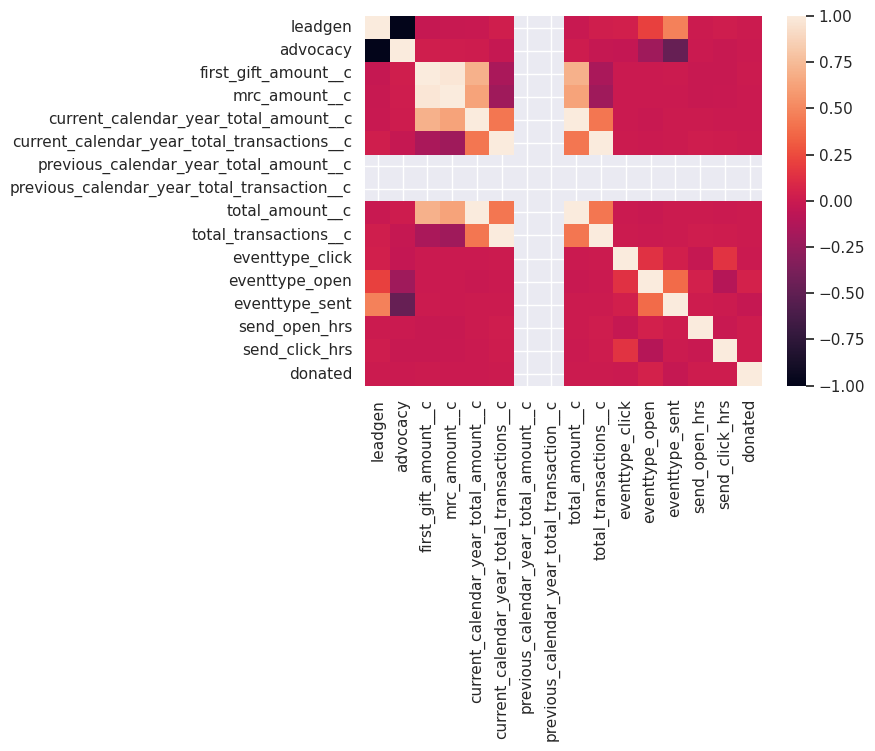

In [215]:
import seaborn as sns
# mat.figure(figsize= (20, 10))
sns.heatmap(s4_final.corr(),annot= False)

Create Training and Test Data Sets

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [199]:
print(X_train.size, X_test.size, y_train.size, y_test.size)

175488 86448 10968 5403


In [200]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model = LogisticRegression()

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

# YOUR CODE HERE
probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

# YOUR CODE HERE
l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

# YOUR CODE HERE
class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.999005     0.000995
     0.998982     0.001018
     0.999036     0.000964
     0.999065     0.000935
     0.998972     0.001028
Log loss: 0.001927673679257938
Class labels: [0. 0. 0. 0. 0.]
Accuracy: 1.0


In [201]:
w = {0:4, 1:96}

In [202]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model = LogisticRegression(random_state=13, class_weight=w)

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

# YOUR CODE HERE
probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

# YOUR CODE HERE
l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

# YOUR CODE HERE
class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))


Class Prediction Probabilities: 
 Class: False  Class: True
     0.999630     0.000370
     0.999621     0.000379
     0.999645     0.000355
     0.999659     0.000341
     0.999613     0.000387
Log loss: 0.0003739384993460138
Class labels: [0. 0. 0. 0. 0.]
Accuracy: 1.0


In [203]:
print(model.classes_)

[0. 1.]


In [204]:
def computeAccuracy(threshold_value):

    labels=[]
    for p in probability_predictions[:,0]:
        if p >= threshold_value:
            labels.append(False)
        else:
            labels.append(True)

    acc_score = accuracy_score(y_test, labels)
    return acc_score

In [205]:
thresholds = [0.44, 0.50, 0.55, 0.67, 0.75]
for t in thresholds:
    print("Threshold value {:.2f}: Accuracy {}".format(t, str(computeAccuracy(t))))

Threshold value 0.44: Accuracy 1.0
Threshold value 0.50: Accuracy 1.0
Threshold value 0.55: Accuracy 1.0
Threshold value 0.67: Accuracy 1.0
Threshold value 0.75: Accuracy 1.0


In [206]:
from sklearn.model_selection import GridSearchCV

In [216]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0},
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0},
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0},
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100},
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0},
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1},
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005},
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150},
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500},
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [219]:
# model = LogisticRegression(random_state=13)
# # define evaluation procedure
# grid = GridSearchCV(model,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
# #grid.fit(x,y)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [209]:
# def train_test_LR(X_train, y_train, X_test, y_test, c=1):
#     '''
#     Fit a Linear Regression classifier to the training data X_train, y_train.
#     Return the loss and accuracy of resulting predictions on the test set.
#     Parameters:
#         C = Factor that controls how much regularization is applied to the model.
#     '''
#      # 1. Create the  scikit-learn LogisticRegression model object below and assign to variable 'model'
#       # YOUR CODE HERE
#     model = LogisticRegression(class_weight = w)

#     # 2. Fit the model to the training data below
#      # YOUR CODE HERE
#     model.fit(X_train, y_train)

#     # 3. Make predictions on the test data using the predict_proba() method and assign the result to the
#     # variable 'probability_predictions' below
#      # YOUR CODE HERE
#     probability_predictions = model.predict_proba(X_test)

#     # 4. Compute the log loss on 'probability_predictions' and save the result to the variable 'l_loss' below
#      # YOUR CODE HERE
#     l_loss = log_loss(y_test, probability_predictions)

#     # 5. Make predictions on the test data using the predict() method and assign the result to the
#     # variable 'class_label_predictions' below
#      # YOUR CODE HERE
#     class_label_predictions = model.predict(X_test)

#     # 6. Compute the accuracy score on 'class_label_predictions' and save the result to the variable 'acc_score' below
#     # YOUR CODE HERE
#     acc_score = accuracy_score(y_test, class_label_predictions)
#     print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
#     print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
#     print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
#     print(f'Recall score: {recall_score(y_test,y_pred)}')
#     return l_loss, acc_score

In [210]:
# loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
# print('Log loss: ' + str(loss))
# print('Accuracy: ' + str(acc))

In [211]:
# cs = [10**i for i in range(-10,10)]
# cs

In [212]:
# ll_cs = []
# acc_cs = []

# for val in cs:
#     loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c=val)
#     ll_cs.append(loss)
#     acc_cs.append(acc)

In [213]:
# plt.figure(figsize=(15,5))

# ax = sns.barplot(x=cs, y=ll_cs)
# g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
# ax.set_xlabel('Regularization HyperParameter: C')
# ax.set_ylabel('Log Loss')
# ax.set_ylim([0.5, 0.62])
# g = plt.title('Log Loss Test Performance by Regularization Weight C')

In [214]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# x = np.log10(cs)

# sns.lineplot(x=x, y=acc_cs, marker='o')

# plt.title("Accuracy Test Performance by Regularization Weight C'")
# plt.xlabel("Regularization HyperParameter: C")
# plt.ylabel("Accuracy")
# plt.show()